In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [23]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.utils import make_grid

In [24]:
import os

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
train_transform = transforms.Compose([
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(), # default is p=0.5
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])
])

In [28]:
test_transform = transforms.Compose([
     transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])
]) # We dont need to rotate or horizontal flip

In [29]:
# we will take advantage of torchvision.models
root = "../Data/CATS_DOGS"

train_data = datasets.ImageFolder(os.path.join(root,"train"), transform=train_transform)
test_data = datasets.ImageFolder(os.path.join(root,"test"), transform=test_transform)

torch.manual_seed(42)

train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10)

class_names = train_data.classes

In [30]:
class_names

['CAT', 'DOG']

In [31]:
len(train_data)

18743

In [32]:
len(test_data)

6251

In [33]:
for images, labels in train_loader:
    break

In [34]:
images.shape

torch.Size([10, 3, 224, 224])

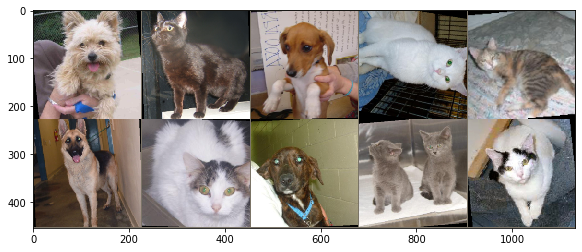

In [35]:
im = make_grid(images, nrow=5) # 5 images per row
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229,1/0.224,1/0.225]
)
im_inv = inv_normalize(im)
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(),(1,2,0)))

In [ ]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(54*54*16,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,2)
        
    def forward(self,X):
        